### Stationarity

Conditions for a time-series to be stationary

1. Mean is constant and not a function of time

2. Variance is constant and not a function of time

3. There exists no seasonality in the time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

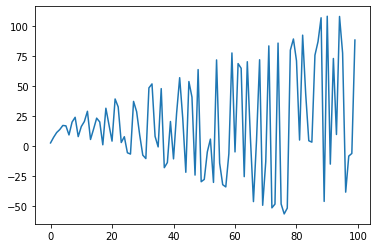

In [3]:
# Variance is a function of time
t = [i for i in range(100)]
y1 = [np.exp(3-2/(t+1)) +  t*np.sin(t*np.random.random()) for t in t]
plt.plot(y1)
plt.show()

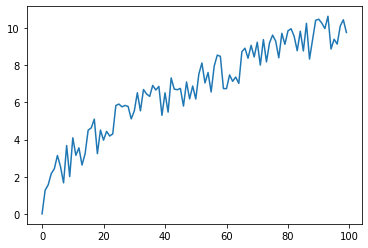

In [4]:
# Mean is a function of time
t = [i for i in range(100)]
y2 = [np.sin(t*np.random.random()) + np.sqrt(t) for t in t]
plt.plot(y2)
plt.show()

# Fourier Decomposition

$\large y(t) \approx \sum [w_i \sin(a_i t) + v_i cos(b_i t)]$ 


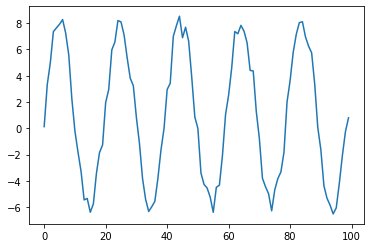

In [6]:
# Seasonality is present
t = [i for i in range(100)]
y3 = [7*np.sin(t/np.pi) + 2*np.random.random() for t in t]
plt.plot(y3)
plt.show()

In [7]:
# Time Series DataFrame
ts_df = pd.DataFrame({'t': t, 
              'y1' : y1,
              'y2' : y2, 
              'y3' : y3})
ts_df

,t,y1,y2,y3
0,0,102.718282,0.000000,0.126785
1,1,107.449843,1.191197,3.315752
2,2,111.252665,2.413153,4.989332
3,3,115.182388,2.227260,7.364167
4,4,113.509252,2.354778,7.646180
...,...,...,...,...
95,95,179.423772,10.120526,-6.056762
96,96,185.304721,8.816832,-4.197686
97,97,188.852391,8.927212,-2.073125
98,98,117.617189,9.190075,-0.245048


,t,y1,y2,y3,y2_diff_1
0,0,102.718282,0.000000,0.126785,NaN
1,1,107.449843,1.191197,3.315752,1.191197
2,2,111.252665,2.413153,4.989332,1.221956
3,3,115.182388,2.227260,7.364167,-0.185893
4,4,113.509252,2.354778,7.646180,0.127518
...,...,...,...,...,...
95,95,179.423772,10.120526,-6.056762,0.415985
96,96,185.304721,8.816832,-4.197686,-1.303694
97,97,188.852391,8.927212,-2.073125,0.110380
98,98,117.617189,9.190075,-0.245048,0.262863


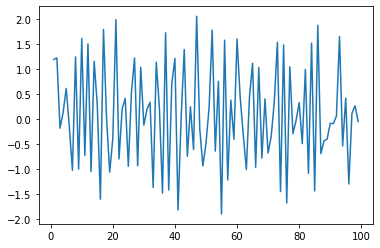

In [8]:
# Eliminating the Trend

ts_df['y2_diff_1'] = ts_df.y2.diff(1)
plt.plot(ts_df.t, ts_df.y2_diff_1)
ts_df

,t,y1,y2,y3,y2_diff_1,box_y1
0,0,102.718282,0.000000,0.126785,NaN,34.670150
1,1,107.449843,1.191197,3.315752,1.191197,35.819904
2,2,111.252665,2.413153,4.989332,1.221956,36.732852
3,3,115.182388,2.227260,7.364167,-0.185893,37.666356
4,4,113.509252,2.354778,7.646180,0.127518,37.270106
...,...,...,...,...,...,...
95,95,179.423772,10.120526,-6.056762,0.415985,51.798510
96,96,185.304721,8.816832,-4.197686,-1.303694,53.007097
97,97,188.852391,8.927212,-2.073125,0.110380,53.730533
98,98,117.617189,9.190075,-0.245048,0.262863,38.239882


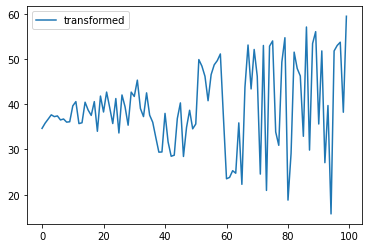

In [9]:
# Eliminating varying variance
from scipy import stats

ts_df['box_y1'],_ = stats.boxcox(x = list(ts_df.y1))
plt.plot(ts_df.t, ts_df.box_y1, label = 'transformed')
# plt.plot(ts_df.t, ts_df.y1, label = 'original')
plt.legend()
ts_df

,t,y1,y2,y3,y2_diff_1,box_y1,y3_sdiff
0,0,102.718282,0.000000,0.126785,NaN,34.670150,NaN
1,1,107.449843,1.191197,3.315752,1.191197,35.819904,NaN
2,2,111.252665,2.413153,4.989332,1.221956,36.732852,NaN
3,3,115.182388,2.227260,7.364167,-0.185893,37.666356,NaN
4,4,113.509252,2.354778,7.646180,0.127518,37.270106,NaN
...,...,...,...,...,...,...,...
95,95,179.423772,10.120526,-6.056762,0.415985,51.798510,-1.366464
96,96,185.304721,8.816832,-4.197686,-1.303694,53.007097,-0.365403
97,97,188.852391,8.927212,-2.073125,0.110380,53.730533,1.250628
98,98,117.617189,9.190075,-0.245048,0.262863,38.239882,1.577548


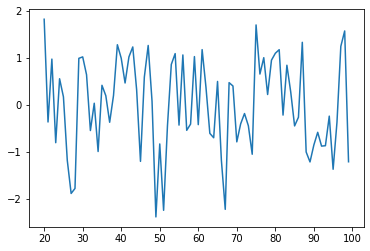

In [10]:
# Eliminating Seasonality

ts_df['y3_sdiff'] = ts_df.y3.diff(20)
plt.plot(ts_df.t, ts_df.y3_sdiff)
ts_df

#### Tests for Stationarity

1. Augmented Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ts_df.y2_diff_1.dropna())
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -3.788123
p-value: 0.003031
Critical value @ 0.05: -2.90
